In [ ]:
# default_exp experiments.feature_gen

In [1]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Features


> This module contains all the necessary functions for extracting and organizing features from videos.

In [15]:
#export
import cv2
# import ffmpeg

import torch

import numpy as np

# tango
from tango.prep import *

from tango.features import *
from tango.model import *

from pathlib import Path

from PIL import Image

from matplotlib import pyplot as plt

# from nbdev.showdoc import *

In [85]:
path = Path("/tf/data/datasets/videos")
video_paths = sorted(path.glob("**/video.mp4")); video_paths[:6]

[PosixPath('/tf/data/datasets/videos/art_and_design/ibis_paint/scenario1/video.mp4'),
 PosixPath('/tf/data/datasets/videos/art_and_design/ibis_paint/scenario2/video.mp4'),
 PosixPath('/tf/data/datasets/videos/art_and_design/pixel_art_paint/scenario1/video.mp4'),
 PosixPath('/tf/data/datasets/videos/art_and_design/pixel_art_paint/scenario2/video.mp4'),
 PosixPath('/tf/data/datasets/videos/auto_and_vehicles/car_part/scenario1/video.mp4'),
 PosixPath('/tf/data/datasets/videos/auto_and_vehicles/car_part/scenario2/video.mp4')]

In [3]:
rico_path = Path('/tf/data/combined/data')
img_paths = sorted(rico_path.glob('*.jpg'))
len(img_paths), img_paths[:5]

(66261,
 [PosixPath('/tf/data/combined/data/0.jpg'),
  PosixPath('/tf/data/combined/data/1.jpg'),
  PosixPath('/tf/data/combined/data/10.jpg'),
  PosixPath('/tf/data/combined/data/100.jpg'),
  PosixPath('/tf/data/combined/data/1000.jpg')])

In [76]:
from random import sample

n = 100
# sampled_imgs = [np.array(Image.open(img)) for img in sample(img_paths, n)]
sampled_imgs = [Image.open(img) for img in sample(img_paths, n)]
len(sampled_imgs)

100

# SimCLR Features

In [77]:
model_name = 'SimCLR-ResNet50'

model = SimCLRModel.load_from_checkpoint(checkpoint_path='/tf/data/models/simclr/checkpointepoch=98.ckpt').eval()
simclr_extractor = SimCLRExtractor(model)

In [ ]:
def run_experiment(imgs, extractor, vw):
    pass

In [78]:
vwords = 10
codebook = gen_vcodebook(sampled_imgs, simclr_extractor, vwords)
fname = f'/tf/data/models/cookbook_{model_name}mdl_{len(sampled_imgs)}n_{vwords}vw.model'
# pickle.dump(codebook, open(fname, 'wb'))

(100, 64)


In [118]:
codebook.labels_

array([3, 3, 0, 5, ..., 2, 2, 2, 7], dtype=int32)

In [121]:
np.expand_dims(codebook.labels_, axis = 0).shape

(1, 100)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

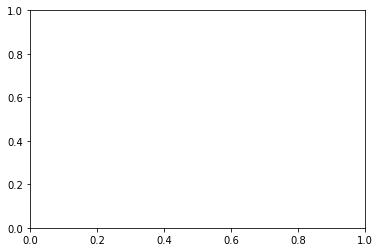

In [123]:
df = np.histogram(codebook.labels_, bins = range(vwords))[0]
# plt.bar(range(vwords), df)

In [145]:
for i in range(vwords):
    print(i, sum(codebook.labels_ == i))

0 17
1 13
2 8
3 14
4 1
5 25
6 9
7 6
8 1
9 6


In [151]:
df = np.histogram(codebook.labels_, bins = range(vwords + 1))[0]; df

array([17, 13,  8, 14,  1, 25,  9,  6,  1,  6])

In [147]:
np.array(np.unique(codebook.labels_, return_counts=True)).T

array([[ 0, 17],
       [ 1, 13],
       [ 2,  8],
       [ 3, 14],
       [ 4,  1],
       [ 5, 25],
       [ 6,  9],
       [ 7,  6],
       [ 8,  1],
       [ 9,  6]])

In [146]:
df

array([17, 13,  8, 14,  1, 25,  9,  6,  7])

In [135]:
np.pad(df, (0, vwords - len(df)), mode = 'constant')

array([17, 13,  8, 14,  1, 25,  9,  6,  7,  0])

In [130]:
vwords

10

(array([0., 1., 0., 0., 0., 0., 1., 1., 2.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

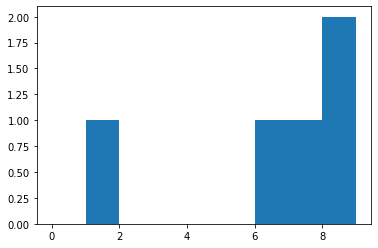

In [125]:
plt.hist(df, bins = range(vwords))

<BarContainer object of 10 artists>

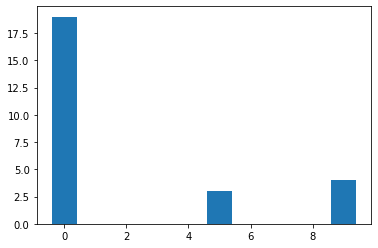

In [115]:
# vid = Video(video_paths[3])
bovw = new_get_bovw(vid, simclr_extractor, codebook, vwords, frames_to_keep = 2)
plt.bar(range(vwords), bovw)

In [2]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_prep.ipynb.
Converted 01_features.ipynb.
Converted 02_eval.ipynb.
Converted 03_cnn.ipynb.
This cell doesn't have an export destination and was ignored:
 
Converted 04_experiments.ipynb.
Converted 05_model.ipynb.
Converted SimCLR.old.ipynb.
Converted [Scratch 1] Tango SimCLR.ipynb.
Converted [Scratch 2] Tango SimCLR.ipynb.
Converted index.ipynb.
Converted lesson1-pets.ipynb.
